# Metody Numeryczne

## Problem najmniejszych kwadratów



### dr hab. inż. Jerzy Baranowski, Prof.AGH

# Residuum

- Ang. Residual
- Użyteczna wielkość do oceny jakości rozwiązania równania liniowego
$$
r=b-Ax
$$
- Często wykorzystujemy również normę residuum
$$
\Vert r\Vert_2=\sqrt{r^*r}
$$

# Przykład motywacyjny

Dopasowanie wielomianu do 11 punktów róownoodległych


$$
p(x)=c_0+c_1 x+c_2 x^2 +\ldots +c_{m-1} x^{m-1} 
$$

$$
\begin{bmatrix}
1&x_1&x_1^2&&x_1^{m-1}\\
1&x_2&x_2^2&\dots&x_2^{m-1}\\
1&x_3&x_3^2&&x_3^{m-1}\\
&\vdots&&\ddots&\vdots\\
1&x_m&x_m^2&\dots&x_m^{m-1}
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\c_2\\\vdots\\ c_{m-1}
\end{bmatrix}
=
\begin{bmatrix}
y_1\\y_2\\y_3\\\vdots\\ y_{m}
\end{bmatrix}
$$

In [1]:
import numpy as np
import numpy.linalg as nplin
import scipy
import matplotlib.pyplot as plt
import scipy.sparse.linalg


(-1.0, 5.0)

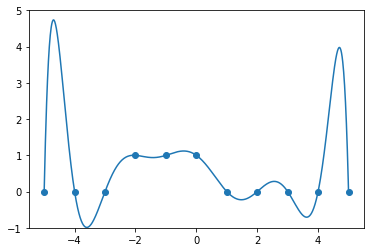

In [2]:
x=[i for i in range(-5,6)]
y=np.array([0,0,0,1,1,1,0,0,0,0,0]).astype(float)
A=np.vander(x,11)
c=nplin.solve(A,y)
p_int=np.poly1d(c)
X=np.linspace(-5,5,1000)
plt.plot(X,p_int(X))
plt.scatter(x,y)
axes = plt.gca()
axes.set_ylim([-1,5])

# Wielomian niższego stopnia
Szukamy wielomianu 


$$
p(x)=c_0+c_1 x+c_2 x^2 +\ldots +c_{n-1} x^{n-1} 
$$

który będzie minimalizował
$$
\sum_{i=1}^m|p(x_i)-y_i|^2
$$

czyli kwadrat normy residuum układu
$$
\begin{bmatrix}
1&x_1&x_1^2&&x_1^{n-1}\\
1&x_2&x_2^2&\dots&x_2^{n-1}\\
1&x_3&x_3^2&&x_3^{n-1}\\
&\vdots&&\ddots&\vdots\\
1&x_m&x_m^2&\dots&x_m^{n-1}
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\\vdots\\ c_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
y_1\\y_2\\y_3\\\vdots\\ y_{m}
\end{bmatrix}
$$

(-1.0, 5.0)

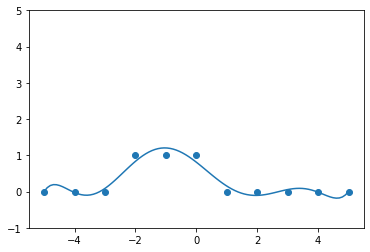

In [3]:
x=[i for i in range(-5,6)]
y=np.array([0,0,0,1,1,1,0,0,0,0,0])
plt.scatter(x,y)
A=np.vander(x,8)
c,res,r,s=nplin.lstsq(A,y,rcond=-1)
p_int=np.poly1d(c)
X=np.linspace(-5,5,100)
plt.plot(X,p_int(X))
axes = plt.gca()
axes.set_ylim([-1,5])

# Układ równań z macierzą prostokątną
- Układ równań z macierzą prostokątną zazwyczaj jest sprzeczny.
- Możemy go rozwiązać poprzez minimalizację normy residuum
- Jest to tzw. Problem najmniejszych kwadratów

## Rozwiązanie problemu - interpretacja geometryczna

Chcemy znaleźć rozwiązanie układu równań
$$
A x=b
$$
gdzie $A\in R^{m\times n},\ b\in R^m$ oraz $x\in R^n$. Geometrycznie chcemy skonstruować wektor $b$ z kolumn macierzy $A$.

Jeżeli $b$ nie jest liniowo zależne od kolumn $A$ nie jest to możliwe. Oznacza to, że wektor $b$ składa się więc z części, którą można przedstawić za pomocą kolumn macierzy $A$ oraz z części, dla której to nie jest możliwe.




## Interpretacja geometryczna - ciąg dalszy

Część, której nie da się przedstawić to właśnie residuum -  $r=b-Ax$. W takiej sytuacji musi ono być ortogonalne do kolumn macierzy $A$, czyli


$$
A^* r=0
$$
Lub równoważnie
$$
A^*Ax=A^*b
$$


## Rozwiązanie problemu -  interpretacja optymalizacyjna

Szukamy minimum ze względu na $x$
$$ \min_x \|r\|^2$$

Przekształcamy

$$
\begin{aligned}
\|r\|^2={}&r^* r \\={}& (Ax-b)^*(Ax-b)\\={}&(x^*A^*-b^*)(Ax-b)\\
={}& x^*A^*Ax-x^*A^*b-b^*A x-b^*b\\
={}& x^*A^*Ax-2x^*A^*b-b^*b
\end{aligned}
$$

## Interpretacja optymalizacyjna - ciąg dalszy

Funkcja wielu zmiennych ma minimum, gdy jej wektor pochodnych cząstkowych (gradient) jest równy 0 i jej macierz drugich pochodnych (Hesjan) jest dodatnio określona.

$$
\nabla \left(x^*A^*Ax-2x^*A^*b-b^*b \right)= 2 A^*Ax -2A^*b
$$
$$
A^*Ax -2A^*b = 0
$$
$$
A^*Ax=A^*b
$$

$$
\nabla^2 \left(x^*A^*Ax-2x^*A^*b-b^*b \right) = 2A^*A
$$
Macierz postaci $ A^*A$ jest zawsze symetryczna, i jeżeli ma pełny rząd, to jest dodatnio określona (jeśli nie to tylko pół-dodatnio)

# Praktyczne wyznaczanie x

- Rozwiązanie układu równań normalnych
$$
A^*Ax=A^*b
$$
za pomocą rozkładu Choleskiego
- za pomocą SVD
$$
\begin{aligned}
A={}&U\Sigma V^*\\
V\Sigma U^*U\Sigma V^*x={}&V\Sigma U^*b\\
\Sigma V^*x={}& U^*b\\
\Sigma y={}& U^*b\\
x={}&Vy
\end{aligned}
$$

## Praktyczne wyznaczanie x

Jest jeszcze jedna metoda - rozkład QR

Rozkład QR ma postać $A=QR$, gdzie $Q$ jest unitarna a $R$ trójkątna górna. Wtedy

$$
\begin{aligned}
A={}&QR\\
R^*Q^*QRx={}&R^*Q^*b\\
Rx={}&Q^*b
\end{aligned}
$$
